# Guided Project: Storytelling Data Visualization on Exchange Rates

The dataset we'll use describes Euro daily exchange rates between 1999 and 2021. The euro (symbolized with €) is the official currency in most of the countries of the European Union.

If the exchange rate of the euro to the US dollar is 1.5, you get 1.5 US dollars if you pay 1.0 euro (one euro has more value than one US dollar at this exchange rate).

Daria Chemkaeva put together the data set and made it available on Kaggle — the data source is the European Central Bank. Note that the dataset gets regular updates — we downloaded it on January 2021.

### To explore the variability of the EUR-USD (United States) and EUR-GBP (United Kingdom) exchange rates; and determine their behavior during 2007-2008's financial crisis period.

In [1]:
#importing neccessary datasets
import pandas as pd

#Reading in the dataset
exchange_rates = pd.read_csv('euro-daily-hist_1999_2020.csv')

print(exchange_rates.head(5))
print(exchange_rates.tail(5))

  Period\Unit: [Australian dollar ] [Bulgarian lev ] [Brazilian real ]  \
0   2021-01-08               1.5758           1.9558            6.5748   
1   2021-01-07               1.5836           1.9558            6.5172   
2   2021-01-06               1.5824           1.9558            6.5119   
3   2021-01-05               1.5927           1.9558            6.5517   
4   2021-01-04               1.5928           1.9558            6.3241   

  [Canadian dollar ] [Swiss franc ] [Chinese yuan renminbi ] [Cypriot pound ]  \
0             1.5543         1.0827                   7.9184              NaN   
1             1.5601         1.0833                   7.9392              NaN   
2             1.5640         1.0821                   7.9653              NaN   
3             1.5651         1.0803                   7.9315              NaN   
4             1.5621         1.0811                   7.9484              NaN   

  [Czech koruna ] [Danish krone ]  ... [Romanian leu ] [Russian roub

In [2]:
exchange_rates.head()

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
0,2021-01-08,1.5758,1.9558,6.5748,1.5543,1.0827,7.9184,NaN,26.163,7.4369,...,4.8708,90.8000,10.0510,1.6228,NaN,NaN,36.8480,9.0146,1.2250,18.7212
1,2021-01-07,1.5836,1.9558,6.5172,1.5601,1.0833,7.9392,NaN,26.147,7.4392,...,4.8712,91.2000,10.0575,1.6253,NaN,NaN,36.8590,8.9987,1.2276,18.7919
2,2021-01-06,1.5824,1.9558,6.5119,1.5640,1.0821,7.9653,NaN,26.145,7.4393,...,4.8720,90.8175,10.0653,1.6246,NaN,NaN,36.9210,9.0554,1.2338,18.5123
3,2021-01-05,1.5927,1.9558,6.5517,1.5651,1.0803,7.9315,NaN,26.227,7.4387,...,4.8721,91.6715,10.0570,1.6180,NaN,NaN,36.7760,9.0694,1.2271,18.4194
4,2021-01-04,1.5928,1.9558,6.3241,1.5621,1.0811,7.9484,NaN,26.141,7.4379,...,4.8713,90.3420,10.0895,1.6198,NaN,NaN,36.7280,9.0579,1.2296,17.9214


In [3]:
exchange_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5699 entries, 0 to 5698
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              5699 non-null   object 
 1   [Australian dollar ]      5699 non-null   object 
 2   [Bulgarian lev ]          5297 non-null   object 
 3   [Brazilian real ]         5431 non-null   object 
 4   [Canadian dollar ]        5699 non-null   object 
 5   [Swiss franc ]            5699 non-null   object 
 6   [Chinese yuan renminbi ]  5431 non-null   object 
 7   [Cypriot pound ]          2346 non-null   object 
 8   [Czech koruna ]           5699 non-null   object 
 9   [Danish krone ]           5699 non-null   object 
 10  [Estonian kroon ]         3130 non-null   object 
 11  [UK pound sterling ]      5699 non-null   object 
 12  [Greek drachma ]          520 non-null    object 
 13  [Hong Kong dollar ]       5699 non-null   object 
 14  [Croatia

# Data Cleaning

In [4]:
exchange_rates.rename(columns={'[US dollar ]': 'US_dollar',
                               'Period\\Unit:': 'Time'},
                      inplace=True)
exchange_rates['Time'] = pd.to_datetime(exchange_rates['Time'])
exchange_rates.sort_values('Time', inplace=True)
exchange_rates.reset_index(drop=True, inplace=True)

In [5]:
euro_to_dollar = exchange_rates[['US_dollar', 'Time']].copy()

In [6]:
euro_to_dollar['US_dollar'].value_counts()

-         62
1.2276     9
1.1215     8
1.1305     7
1.1346     6
          ..
1.2568     1
1.0553     1
1.0410     1
1.4501     1
0.9164     1
Name: US_dollar, Length: 3528, dtype: int64

In [7]:
euro_to_dollar = euro_to_dollar[euro_to_dollar['US_dollar'] != '-']
euro_to_dollar['US_dollar'] = euro_to_dollar['US_dollar'].astype(float)
euro_to_dollar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5637 entries, 0 to 5698
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   US_dollar  5637 non-null   float64       
 1   Time       5637 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 132.1 KB


# Rolling Mean

Now that we're finished cleaning the data, we'll generate a line plot to visualize the evolution of the euro-dollar exchange rate.

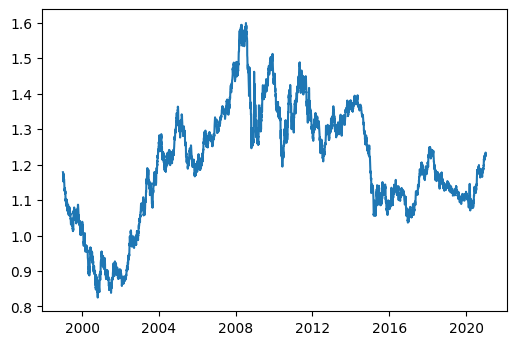

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline 

plt.plot(euro_to_dollar['Time'],
         euro_to_dollar['US_dollar'])
plt.show()

If we look at the line's shape, we see many small wiggles — rather than seeing a smooth line. The wiggles, however, have meaning: : they are the visual representation of the daily variation in the exchange rate. The rate goes up and down, up and down again, day to day. The rate only shows clear upward or downward trends in the longer run (months or years).

Depending on our goals, we may not want to show that daily variation on our graph. If we want to hide it and show only the long-term trends, we can use the rolling mean (also known as the moving average).


In [9]:
#Calculate the rolling means for the US_dollar column using a moving window of 30 days and Adding the rolling means to a new column named rolling_mean.
euro_to_dollar['rolling_mean'] = euro_to_dollar['US_dollar'].rolling(30).mean()
euro_to_dollar

,US_dollar,Time,rolling_mean
0,1.1789,1999-01-04,NaN
1,1.1790,1999-01-05,NaN
2,1.1743,1999-01-06,NaN
3,1.1632,1999-01-07,NaN
4,1.1659,1999-01-08,NaN
...,...,...,...
5694,1.2296,2021-01-04,1.211170
5695,1.2271,2021-01-05,1.212530
5696,1.2338,2021-01-06,1.213987
5697,1.2276,2021-01-07,1.215357


# Storytelling Data Visualization

We show how the euro-dollar rate has changed during the coronavirus pandemic. We can show the 2020 data and the 2016-2019 data as a baseline. We can use a line plot.

In [10]:
coronavirus_pan_16_19 = euro_to_dollar.copy(
                   )[(euro_to_dollar['Time'].dt.year >= 2016
                   ) & (euro_to_dollar['Time'].dt.year <= 2019)]
coronavirus_pan_20 = euro_to_dollar.copy(
                   )[(euro_to_dollar.Time.dt.year == 2020
                   ) ]

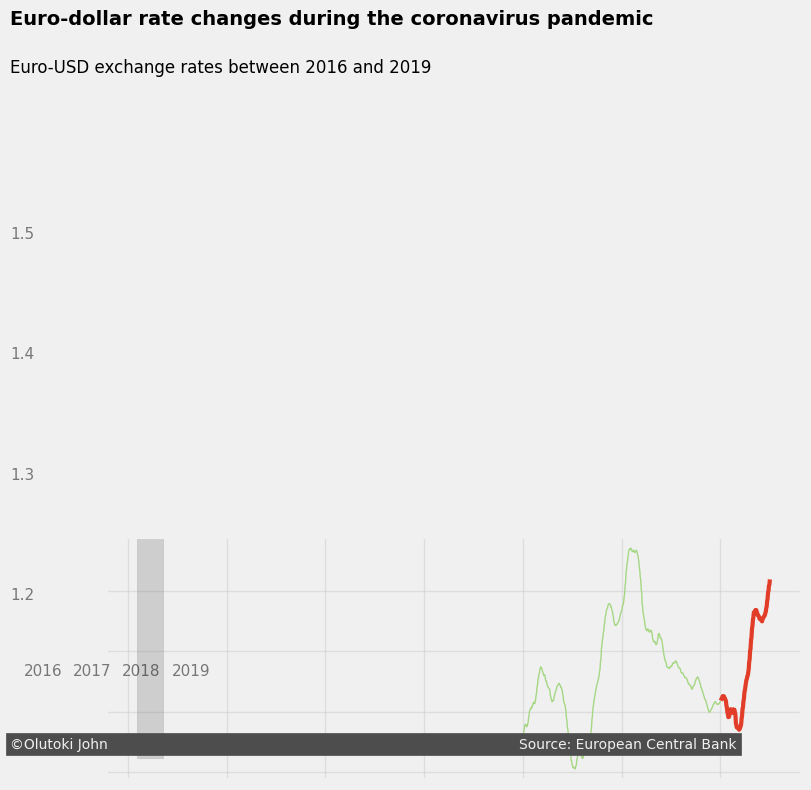

In [11]:
### Adding the FiveThirtyEight style
import matplotlib.style as style
style.use('fivethirtyeight')

### Adding the plot
fig,ax = plt.subplots(figsize=(8,3))
ax.plot(coronavirus_pan_16_19['Time'],
        coronavirus_pan_16_19['rolling_mean'],
        linewidth=1, color='#A6D785')

### Highlighting the 2020 period
ax.plot(coronavirus_pan_20['Time'],
        coronavirus_pan_20['rolling_mean'],
        linewidth=3, color='#e23d28')

### Highlihting the peak of the crisis
ax.axvspan(xmin=733112.0, xmax=733302.0, ymin=0.09,
           alpha=0.3, color='grey')
    
### Adding separate tick labels
ax.set_xticklabels([])
ax.set_yticklabels([])

x = 732272.0
for year in ['2016', '2017', '2018', '2019']:
    ax.text(x, 1.13, year, alpha=0.5, fontsize=11)
    x += 365

y = 1.193   
for rate in ['1.2', '1.3', '1.4', '1.5']:
    ax.text(732172.0, y, rate, alpha=0.5, fontsize=11)
    y += 0.1

## Adding a title and a subtitle    
ax.text(732172.0, 1.67, "Euro-dollar rate changes during the coronavirus pandemic",
        weight='bold')
ax.text(732172.0, 1.63, 'Euro-USD exchange rates between 2016 and 2019',
        size=12)

### Adding a signature
ax.text(732172.0, 1.07, '©Olutoki John' + ' '*94 + 'Source: European Central Bank',
        color = '#f0f0f0', backgroundcolor = '#4d4d4d',
        size=10)

### Add some transparency to the grid
ax.grid(alpha=0.5)

plt.show()

## Summary of Results
<p>We determined that the 2007-2008 global financial crisis (which originated in the U.S.) had a significant impact on exchange rates.</p>
<p>The EUR-USD exchange rate peaked when the crisis was beginning to affect the European zone (April 2008). Later, in January 2009, the EUR-GBP exchange rate would reach its maximum value; when several European countries were starting to be bailed out due to severe financial problems.</p>
<p>We also observed how the EUR-GBP exchange rate increased (mid-2016) because of the negotiations for the withdrawal of the United Kingdom from the European Union (Brexit).</p>